<a href="https://colab.research.google.com/github/CODEWITHSTG/-furniture-website/blob/main/Copy_of_Raisin_Classification_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Raisin_Dataset.xlsx to Raisin_Dataset (2).xlsx
Dataset Shape: (900, 8)
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float

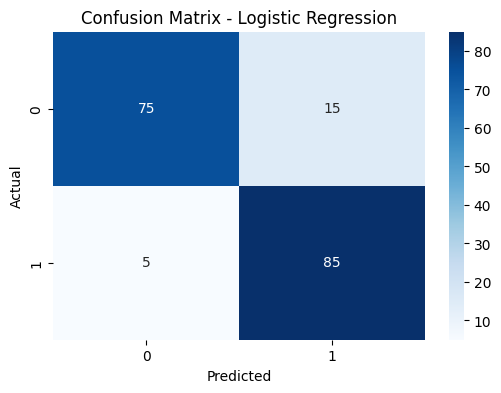

In [ ]:
# ====================================================
# Raisin Variety Classification with Logistic Regression
# ====================================================

# 1. Install dependencies (only needed once in Colab)
!pip install scikit-learn pandas matplotlib openpyxl seaborn

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3. Load dataset (manual upload into Colab)
from google.colab import files
uploaded = files.upload()   # 👉 Choose Raisin_Dataset.xlsx from your device

# ✅ Automatically detect uploaded file name (handles (1), (2), etc.)
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, engine="openpyxl")

print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

# 4. Separate features (X) and target (y)
X = df.drop("Class", axis=1)   # Features
y = df["Class"]                # Target (Kecimen / Besni)

# 5. Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")

# 8. 5-Fold Cross Validation on Training Data
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# 9. Train on full training set
log_reg.fit(X_train_scaled, y_train)

# 10. Evaluate on test set
y_pred = log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 11. Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()